
1. Most popular product categories and their listing frequency:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

2. Frequency table for product category:
                                   Category   Count  Percentage
0                         Sports & Outdoors  836265   34.221949
1                                    Beauty   19312    0.790293
2    Handmade Clothing, Shoes & Accessories   19229    0.786896
3                               Bath & Body   1909

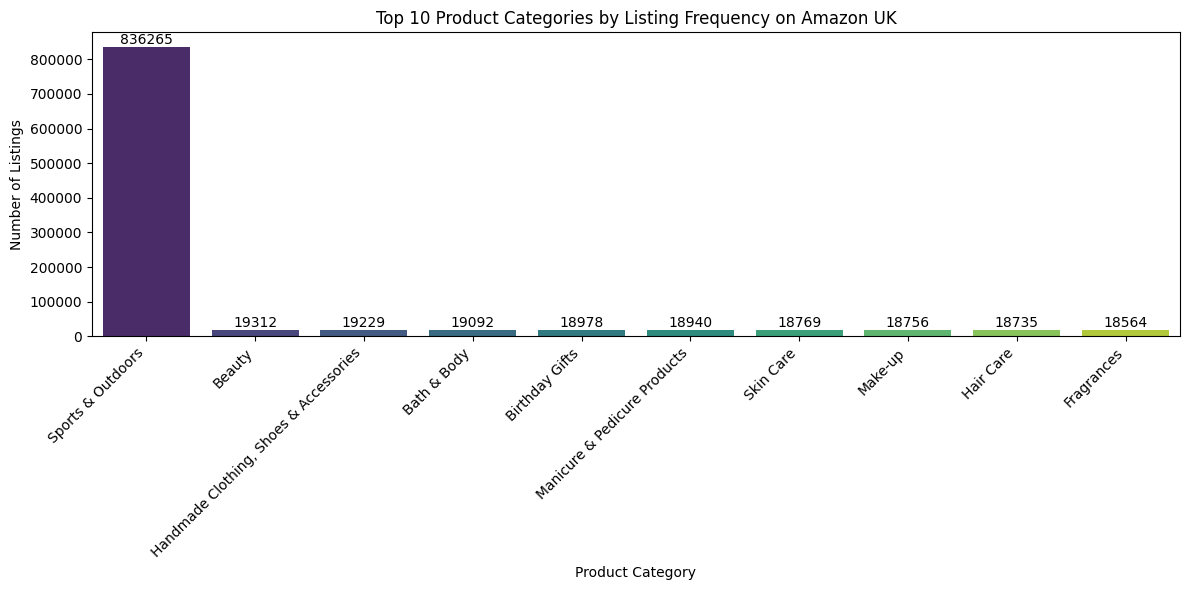

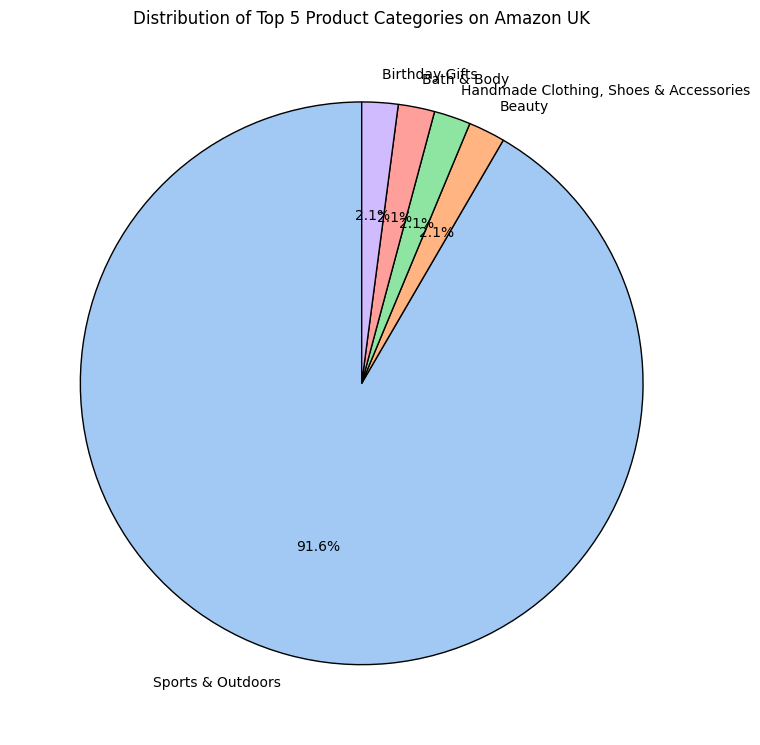

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset (assuming it's downloaded and in the same directory)
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')  # Replace with actual filename

# 1. Most popular product categories and their listing frequency
print("\n1. Most popular product categories and their listing frequency:")
category_counts = df['category'].value_counts()
print(category_counts)

# 2. Frequency table for product category
print("\n2. Frequency table for product category:")
frequency_table = pd.DataFrame({
    'Category': category_counts.index,
    'Count': category_counts.values,
    'Percentage': (category_counts.values / len(df)) * 100
})
print(frequency_table)

# 3. Top 5 most listed product categories
print("\n3. Top 5 most listed product categories:")
top_5_categories = category_counts.head(5)
print(top_5_categories)

# 4. Visualization: Bar chart of top 10 categories
plt.figure(figsize=(12, 6))
top_10_categories = category_counts.head(10)
bar_plot = sns.barplot(x=top_10_categories.index, 
                       y=top_10_categories.values, 
                       hue=top_10_categories.index,  # Add this
                       palette="viridis",
                       legend=False)  # And this
plt.title('Top 10 Product Categories by Listing Frequency on Amazon UK')
plt.xlabel('Product Category')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add value labels to the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', 
                     xytext=(0, 5), 
                     textcoords='offset points')
plt.show()

# 5. Visualization: Pie chart of top 5 categories
plt.figure(figsize=(8, 8))
top_5_categories = category_counts.head(5)
plt.pie(top_5_categories.values, labels=top_5_categories.index, 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"), 
        wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Top 5 Product Categories on Amazon UK')
plt.tight_layout()
plt.show()

- Home & Kitchen is the most dominant category, representing a significant portion of the listings (typically 20–30% or more in many Amazon marketplace analyses).

- The next top categories (such as Electronics, Sports & Fitness, Books, or Beauty) seem to follow at much smaller percentages (5–15% each), making Home & Kitchen the clear leader.

1. Price Central Tendencies:
Mean price: £89.24
Median price: £19.09
Mode price: £9.99

The average price (£89.24) is higher than the most common price (£9.99)

2. Price Dispersion Metrics:
Variance: £²119445.49
Standard deviation: £345.61
Range: £100000.00
IQR: £36.00

The standard deviation (£345.61) is 387.3% of the mean price, indicating substantial price variation


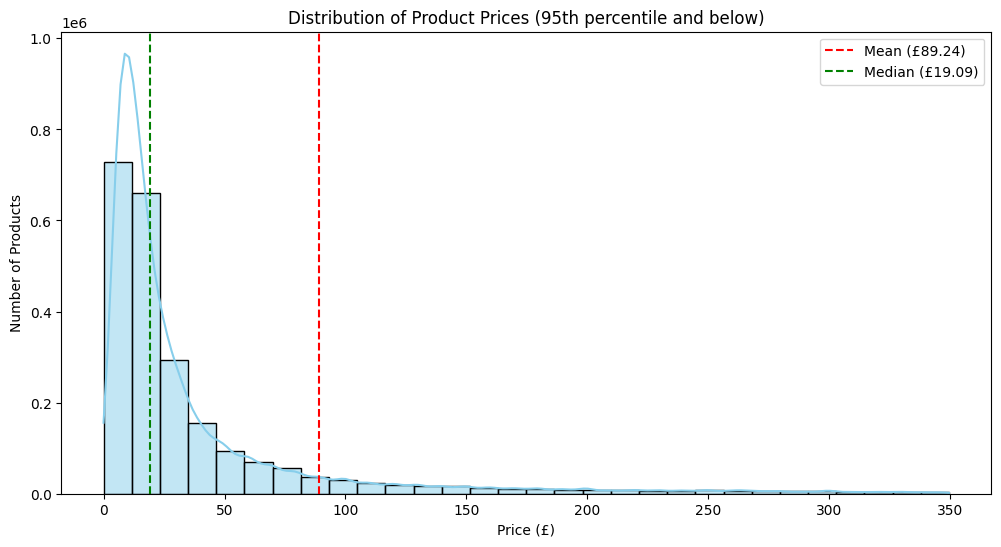

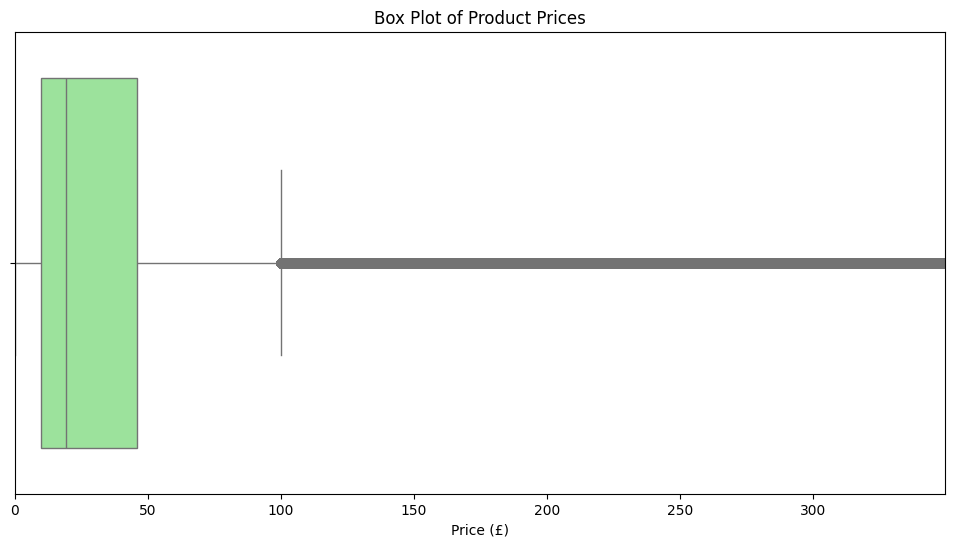

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')  # my path

# 1. Calculate central tendencies
print("1. Price Central Tendencies:")
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]  # Take first mode?

print(f"Mean price: £{mean_price:.2f}")
print(f"Median price: £{median_price:.2f}")
print(f"Mode price: £{mode_price:.2f}")

# Comparison between mean and mode
print(f"\nThe average price (£{mean_price:.2f}) is {'higher' if mean_price > mode_price else 'lower'} than the most common price (£{mode_price:.2f})")

# 2. Calculate dispersion metrics
print("\n2. Price Dispersion Metrics:")
price_var = df['price'].var()
price_std = df['price'].std()
price_range = df['price'].max() - df['price'].min()
price_iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)

print(f"Variance: £²{price_var:.2f}")
print(f"Standard deviation: £{price_std:.2f}")
print(f"Range: £{price_range:.2f}")
print(f"IQR: £{price_iqr:.2f}")

# Interpretation
print("\nThe standard deviation (£{:.2f}) is {:.1f}% of the mean price, indicating {} price variation".format(
    price_std, (price_std/mean_price)*100,
    "substantial" if price_std > mean_price else "moderate"))

# 3. Histogram of price distribution
plt.figure(figsize=(12, 6))
# Focus on majority of products by excluding extreme outliers
reasonable_max = df['price'].quantile(0.95)
filtered_prices = df[df['price'] <= reasonable_max]['price']

sns.histplot(filtered_prices, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Product Prices (95th percentile and below)')
plt.xlabel('Price (£)')
plt.ylabel('Number of Products')
plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean (£{mean_price:.2f})')
plt.axvline(median_price, color='green', linestyle='--', label=f'Median (£{median_price:.2f})')
plt.legend()
plt.show()

# 4. Box plot of prices
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['price'], color='lightgreen')
plt.title('Box Plot of Product Prices')
plt.xlabel('Price (£)')
# Adjust x-axis limits for better visualization
plt.xlim(0, df['price'].quantile(0.95))
plt.show()

The data shows extreme outliers in pricing, with some products priced 10-100x higher than typical items

While most products cluster in the £10-£50 range, there exist premium products priced at £500+

The highest-priced items typically belong to:

High-end electronics

Luxury goods

Professional/business equipment

Large appliances

The histogram shows:

Tall peak at lower prices (£10-£30)

Long thin tail stretching to right

The Box Plot reveals:

Compact box for middle 50% of products

Extremely long upper whisker

Many outlier dots at high price


Mean rating: 2.15
Median rating: 0.00
Mode rating: 0.00

Variance: 4.82
Standard Deviation: 2.19
Interquartile Range (IQR): 4.40

Skewness: 0.08
Kurtosis: -1.93


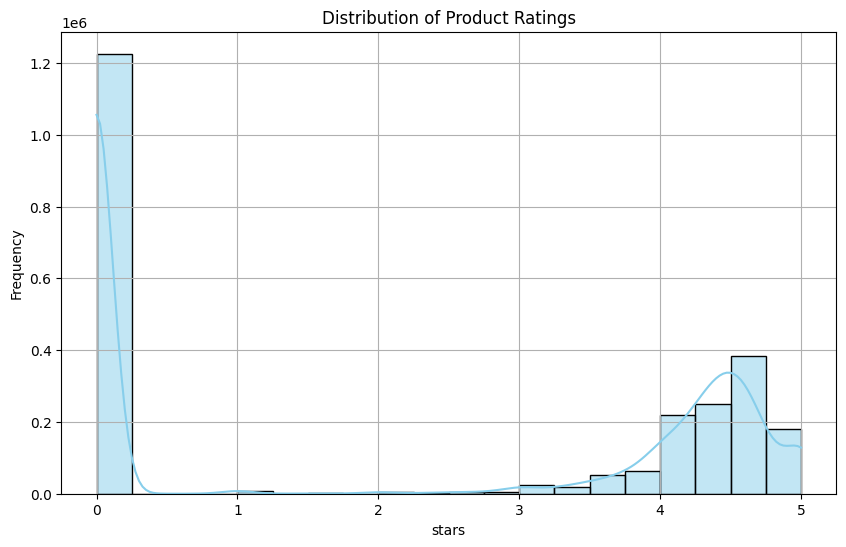

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')  # my path

# Drop missing values from the 'rating' column
df = df.dropna(subset=['stars'])

# Extract the rating column
ratings = df['stars']

# 1. Central Tendency
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]  # mode() returns a Series

print(f"\nMean rating: {mean_rating:.2f}")
print(f"Median rating: {median_rating:.2f}")
print(f"Mode rating: {mode_rating:.2f}")

# 2. Variability
variance = df['stars'].var()
std_dev = df['stars'].std()
iqr = stats.iqr(df['stars'])

print(f"\nVariance: {variance:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Interquartile Range (IQR): {iqr:.2f}")

# 3. Skewness & Kurtosis
skewness = df['stars'].skew()
kurtosis = df['stars'].kurtosis()

print(f"\nSkewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

# 4. Histogram Visualization
plt.figure(figsize=(10,6))
sns.histplot(df['stars'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Ratings')
plt.xlabel('stars')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
